# Forward Stepwise Regression

In [1]:
from math import sqrt

import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()


In [2]:
def x_attr_select(x, idx_set):
    """
    Takes x matrix as list of list and returns subset containing columns in idx_set
    """
    
    x_out = []
    
    for row in x:
        x_out.append([row[i] for i in idx_set])
    
    return x_out


In [3]:
# read data into iterable

x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
                
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)


In [4]:
# divide attributes and labels into training and test sets
indices = range(len(x_list))
x_list_test = [x_list[i] for i in indices if i % 3 == 0]
x_list_train = [x_list[i] for i in indices if i % 3 != 0]

labels_test = [labels[i] for i in indices if i % 3 == 0]
labels_train = [labels[i] for i in indices if i % 3 != 0]


In [5]:
# build list of attributes one at a time - starting with empty
attribute_list = []
index = range(len(x_list[1]))
index_set = set(index)
index_seq = []
oos_error = []

for i in index:
    att_set = set(attribute_list)
    
    # attributes not in list already
    att_try_set = index_set - att_set
    
    # form into list
    att_try = [ii for ii in att_try_set]
    error_list = []
    att_temp = []
        
    # try each attribute not in set to see which one gives least oos error
    for i_try in att_try:
        att_temp = [] + attribute_list
        att_temp.append(i_try)
        
        # use att_temp to form training and testing sub matrices as list of lists
        x_train_temp = x_attr_select(x_list_train, att_temp)
        x_test_temp = x_attr_select(x_list_test, att_temp)
        
        # form into numpy arrays
        x_train = np.array(x_train_temp)
        y_train = np.array(labels_train)
        
        x_test = np.array(x_test_temp)
        y_test = np.array(labels_test)
        
        # use scikit-learn linear regression
        wine_q_model = linear_model.LinearRegression()
        wine_q_model.fit(x_train, y_train)
        
        # use trained model to generate prediction and calculate rms_error
        rms_error = np.linalg.norm((y_test - wine_q_model.predict(x_test)), 2)/sqrt(len(y_test))
        error_list.append(rms_error)
        att_temp = []
                
    i_best = np.argmin(error_list)
    attribute_list.append(att_try[i_best])
    oos_error.append(error_list[i_best])


In [6]:
print(f'Out of sample error versus attribute set size: {oos_error}')
print(f'\nBest attribute indices: {attribute_list}')

names_list = [names[i] for i in attribute_list]
print(f'\nBest attribute names: {names_list}')


Out of sample error versus attribute set size: [0.72342592551162777, 0.68609931528371959, 0.67343650334202776, 0.66770332138977961, 0.66225585685222721, 0.65900047541546247, 0.6572717206143075, 0.65709058062076997, 0.65699930964461351, 0.65758189400434741, 0.65739098690113373]

Best attribute indices: [10, 1, 9, 4, 6, 8, 5, 3, 2, 7, 0]

Best attribute names: ['"alcohol"', '"volatile acidity"', '"sulphates"', '"chlorides"', '"total sulfur dioxide"', '"pH"', '"free sulfur dioxide"', '"residual sugar"', '"citric acid"', '"density"', '"fixed acidity"']


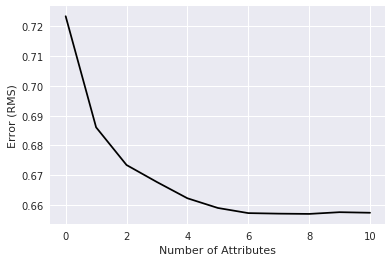

In [7]:
# Plot error versus number of attributes
x = range(len(oos_error))
plt.plot(x, oos_error, 'k')
plt.xlabel('Number of Attributes')
plt.ylabel('Error (RMS)')
plt.show()


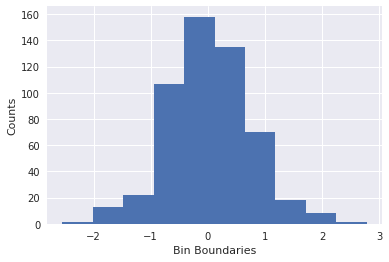

In [8]:
# Plot histogram of out of sample errors for best number of attributes
# Identify index corresponding to min value, restrain with the corresponding attributes
# Use resulting model to predict against out of sample data.
# Plot errors (aka residuals)
index_best = oos_error.index(min(oos_error))
attributes_best = attribute_list[1:(index_best + 1)]

# Define column-wise subsets of x_list_train and x_list_test and convert to numpy
x_train_temp = x_attr_select(x_list_train, attributes_best)
x_test_temp = x_attr_select(x_list_test, attributes_best)

x_train = np.array(x_train_temp)
x_test = np.array(x_test_temp)

# Train and plot error histogram
wine_q_model = linear_model.LinearRegression()
wine_q_model.fit(x_train, y_train)
error_vector = y_test - wine_q_model.predict(x_test)

plt.hist(error_vector)
plt.xlabel('Bin Boundaries')
plt.ylabel('Counts')
plt.show()


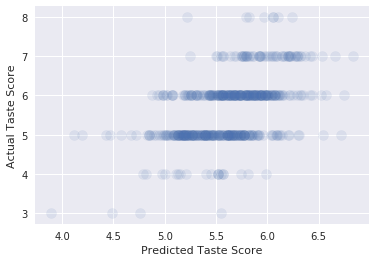

In [9]:
# scatter plot of actual versus predicted
plt.scatter(wine_q_model.predict(x_test), y_test, s=100, alpha=0.10)
plt.xlabel('Predicted Taste Score')
plt.ylabel('Actual Taste Score')
plt.show()
